In [1]:
!pip install tensorflow

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Disease Prediction/train-20260120T162159Z-3-001.zip'
valid_path = '/content/drive/MyDrive/Cotton Disease Prediction/test-20260120T151445Z-3-001.zip'

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
 # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [21]:
from glob import glob # Ensure glob is imported here for consistency
# useful for getting number of output classes from the extracted training data
folders = glob('/content/dataset/train/*')

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
import os
import zipfile

# Define the directory where the datasets will be extracted
extraction_path = '/content/dataset'
os.makedirs(extraction_path, exist_ok=True)

# Unzip training data
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"'{train_path}' unzipped to '{extraction_path}'")

# Unzip validation data
with zipfile.ZipFile(valid_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"'{valid_path}' unzipped to '{extraction_path}'")

# Verify the contents of the extracted directory
print("Contents of extraction_path:")
print(os.listdir(extraction_path))

'/content/drive/MyDrive/Cotton Disease Prediction/train-20260120T162159Z-3-001.zip' unzipped to '/content/dataset'
'/content/drive/MyDrive/Cotton Disease Prediction/test-20260120T151445Z-3-001.zip' unzipped to '/content/dataset'
Contents of extraction_path:
['train', 'test']


In [16]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
# useful for getting number of output classes
folders = glob('/content/dataset/train/*')

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Make sure you provide the same target size as initialied for the image size
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [24]:
import os

# Get class names from training set to ensure consistency
training_class_names = sorted([os.path.basename(f) for f in folders])

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            classes = training_class_names)

Found 18 images belonging to 4 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6315 - loss: 0.9203

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 342s 6s/step - accuracy: 0.6316 - loss: 0.9202 - val_accuracy: 0.6111 - val_loss: 0.8394
Epoch 2/4
61/61 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.6206 - loss: 1.0000 - val_accuracy: 0.6111 - val_loss: 0.7750
Epoch 3/4
61/61 ━━━━━━━━━━━━━━━━━━━━ 387s 6s/step - accuracy: 0.6816 - loss: 0.7411 - val_accuracy: 0.7778 - val_loss: 0.6446
Epoch 4/4
61/61 ━━━━━━━━━━━━━━━━━━━━ 332s 5s/step - accuracy: 0.7601 - loss: 0.6445 - val_accuracy: 0.7778 - val_loss: 0.6046


In [26]:
import matplotlib.pyplot as plt

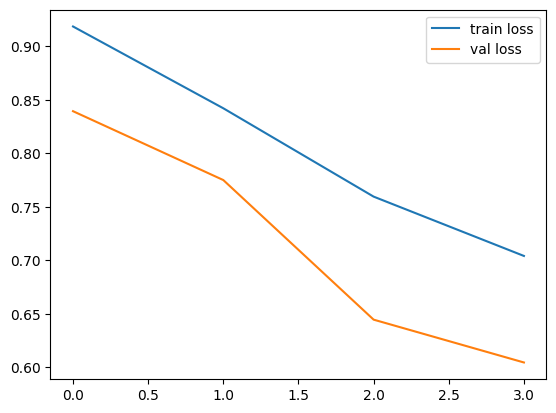

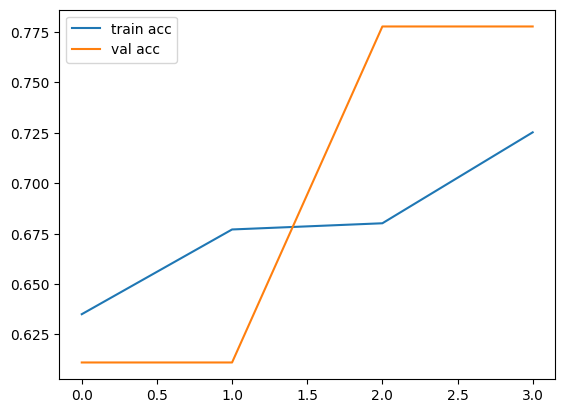

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [29]:
y_pred = model.predict(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [30]:
y_pred

array([[5.68181388e-02, 1.92437604e-01, 1.22650946e-02, 7.38479197e-01],
       [7.57766962e-02, 8.90456885e-02, 8.49392638e-03, 8.26683581e-01],
       [7.10882723e-01, 1.51823491e-01, 1.21775595e-02, 1.25116199e-01],
       [2.73767591e-01, 2.44436320e-02, 6.42797947e-01, 5.89907542e-02],
       [1.19585276e-01, 1.05011631e-02, 8.39056134e-01, 3.08573339e-02],
       [1.00627154e-01, 2.72879273e-01, 5.96676841e-02, 5.66825926e-01],
       [4.80185390e-01, 2.14686871e-01, 1.79685950e-01, 1.25441849e-01],
       [1.47726327e-01, 2.14195698e-01, 4.40741517e-02, 5.94003797e-01],
       [2.81209856e-01, 8.47293716e-03, 6.87362552e-01, 2.29546446e-02],
       [7.72006810e-02, 8.24858069e-01, 1.90166850e-02, 7.89247155e-02],
       [2.61431962e-01, 4.77506042e-01, 4.01787972e-03, 2.57044017e-01],
       [9.25377607e-02, 1.16344355e-02, 8.28345418e-01, 6.74823225e-02],
       [4.74300086e-02, 7.72736311e-01, 7.14862254e-04, 1.79118857e-01],
       [7.48915002e-02, 7.22969294e-01, 2.16166284e

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([3, 3, 0, 2, 2, 3, 0, 3, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0])

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_resnet50.h5')

In [38]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import glob
import os

# The original img_path that caused the error was '/content/dataset/test/diseased cotton leaf/dsc_0067.jpg'

# Try to find an existing image in the same directory or a similar one
# Assuming class folders are directly under /content/dataset/test/
# Let's try to find an image in one of the known classes, e.g., 'diseased cotton leaf'
target_class_dir = os.path.join('/content/dataset/test', 'diseased cotton leaf')
image_files_in_class = glob.glob(os.path.join(target_class_dir, '*.jpg'))

img_path = None
if image_files_in_class:
    img_path = image_files_in_class[0] # Use the first found image
    print(f"Using found image for prediction: {img_path}")
else:
    print(f"No JPG images found in {target_class_dir}. Checking for PNG images.")
    image_files_in_class = glob.glob(os.path.join(target_class_dir, '*.png'))
    if image_files_in_class:
        img_path = image_files_in_class[0] # Use the first found PNG image
        print(f"Using found PNG image for prediction: {img_path}")
    else:
        print(f"No image files (JPG/PNG) found in {target_class_dir}. Please verify the path and file names in your test set.")


if img_path:
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))

    # Convert the image to a numpy array
    x = image.img_to_array(img)

    # Expand dimensions to match the model's input shape (add batch dimension)
    x = np.expand_dims(x, axis=0)

    # Preprocess the input for the ResNet50 model
    img_data = preprocess_input(x)

    print(img_data.shape)
    print('Image data prepared for prediction.')
else:
    img_data = None # Ensure img_data is defined even if no path is found
    print("Image data could not be prepared as no valid image path was found.")

Using found image for prediction: /content/dataset/test/diseased cotton leaf/dis_leaf (322).jpg
(1, 224, 224, 3)
Image data prepared for prediction.


In [42]:
img_data

array([[[[ -0.939003  ,   1.2210007 ,  13.32      ],
         [  7.060997  ,   5.2210007 ,  18.32      ],
         [-13.939003  , -11.778999  ,   0.3199997 ],
         ...,
         [-77.939     ,   4.2210007 , -39.68      ],
         [-65.939     ,  14.221001  , -31.68      ],
         [-34.939003  ,  57.221     ,  17.32      ]],

        [[ 13.060997  ,  22.221     ,  40.32      ],
         [ -0.939003  ,  10.221001  ,  27.32      ],
         [ -6.939003  ,   0.22100067,  10.32      ],
         ...,
         [-57.939003  ,  48.221     ,   2.3199997 ],
         [-75.939     ,   6.2210007 , -37.68      ],
         [-67.939     ,  18.221     , -26.68      ]],

        [[ 14.060997  ,  26.221     ,  39.32      ],
         [ -2.939003  ,   4.2210007 ,  15.32      ],
         [-11.939003  ,  -4.7789993 ,   5.3199997 ],
         ...,
         [-70.939     ,  42.221     ,   6.3199997 ],
         [-73.939     ,  16.221     , -28.68      ],
         [-65.939     ,  20.221     , -26.68      ]],

In [49]:
img=image.load_img('/content/dataset/test/diseased cotton leaf/dis_leaf (322).jpg',target_size=(224,224))

In [50]:
x = image.img_to_array(img) # Convert image to numpy array
x = np.expand_dims(x, axis=0) # Add a single batch dimension
print(x.shape)

(1, 224, 224, 3)


In [62]:
# Removed: x=x/255 as preprocess_input handles scaling

In [63]:
import numpy as np
# Ensure x is 4D (batch, height, width, channels) before preprocessing
# If x is already 4D from the previous step, this will work correctly.
# If x is from a raw image, it needs expand_dims first (handled in 1Z5HJ_nEivv-)
img_data = preprocess_input(x)
print(img_data.shape)

(1, 224, 224, 3)


In [64]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


array([[1.0000000e+00, 8.6675319e-30, 5.0850474e-08, 1.1845574e-29]],
      dtype=float32)

In [57]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


In [58]:
import numpy as np
a=np.argmax(model.predict(img_data), axis=1)
print(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
[0]


In [65]:
import numpy as np
a=np.argmax(model.predict(img_data), axis=1)
predicted_class_index = a[0] # Assuming 'a' is a numpy array with one prediction
predicted_class_name = training_class_names[predicted_class_index]
print(f"The predicted class for the image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
The predicted class for the image is: diseased cotton leaf


In [66]:
import numpy as np
a=np.argmax(model.predict(img_data), axis=1)
predicted_class_index = a[0] # Assuming 'a' is a numpy array with one prediction
predicted_class_name = training_class_names[predicted_class_index]
print(f"The predicted class for the image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
The predicted class for the image is: diseased cotton leaf


In [67]:
import numpy as np
a=np.argmax(model.predict(img_data), axis=1)
print(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
[0]


In [68]:
a==1

array([False])

In [69]:
import tensorflow as tf

In [70]:
tf.__version__

'2.19.0'